#### [학습에 필요한 모듈 선언]

In [4]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# 3차원 공간에서 그래프 출력
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#### [환경설정]

In [5]:
# 학습 데이터 수 선언
trainDataNumber = 200
# 모델 최적화를 위한 학습률 선언
learningRate = 0.01
# 총 학습 횟수 선언
totalStep = 1001

#### [빌드단계] Step 1) 학습 데이터 준비

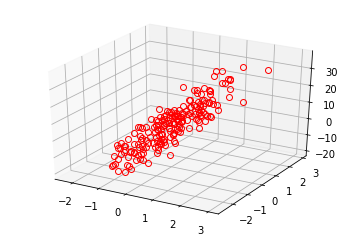

In [6]:
# 항상 같은 난수를 생성하기 위하여 시드설정
np.random.seed(321)

# 학습 데이터 리스트 선언
x1TrainData = list()
x2TrainData = list()
yTrainData = list()


# 학습 데이터 생성
x1TrainData = np.random.normal(0.0, 1.0, size=trainDataNumber)
x2TrainData = np.random.normal(0.0, 1.0, size=trainDataNumber)


for i in range(0,trainDataNumber):
    # y데이터 생성
    x1 = x1TrainData[i]
    x2 = x2TrainData[i]
    y = 10 * x1 + 5.5 * x2 + 3 + np.random.normal(0.0, 3)
    yTrainData.append(y)

# 학 데이터 확인
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1TrainData, x2TrainData, yTrainData,
        linestyle="none", marker="o", mfc="none", markeredgecolor="red")
plt.show()


#### [빌드단계] Step 2) 모델 생성을 위한 변수 초기화

In [7]:
# Weight 변수 선언
W1 = tf.Variable(tf.random_uniform([1]))
W2 = tf.Variable(tf.random_uniform([1]))
# Bias 변수 선언
b = tf.Variable(tf.random_uniform([1]))

# 학습 데이터 x1TrainData, x2TrainData가 들어갈 플레이스 홀더 선언
X1 = tf.placeholder(tf.float32)
X2 = tf.placeholder(tf.float32)
# 학습 데이터 yTrainData가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32)


#### [빌드단계] 3) 학습 모델 그래프 구성

In [8]:
# 3-1) 학습 데이터를 대표 하는 가설 그래프 선언
hypothesis = W1 * X1 + W2 * X2 + b

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = tf.reduce_mean(tf.square(hypothesis - Y))

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
train = optimizer.minimize(costFunction)

#### [실행단계] 학습 모델 그래프를 실행

--------------------------------------------------------------------------------
Train(Optimization) Start
Step : 0, cost : 132.22494506835938, W1 : [0.47595403], W2 : [0.95827603], b : [0.16684061]
Step : 50, cost : 26.875825881958008, W1 : [6.298752], W2 : [4.1142974], b : [2.0501323]
Step : 100, cost : 11.852293968200684, W1 : [8.590395], W2 : [5.1522737], b : [2.7165828]
Step : 150, cost : 9.664752960205078, W1 : [9.49689], W2 : [5.486229], b : [2.9506824]
Step : 200, cost : 9.339253425598145, W1 : [9.857195], W2 : [5.590335], b : [3.0321674]
Step : 250, cost : 9.28976058959961, W1 : [10.001059], W2 : [5.621251], b : [3.0602088]
Step : 300, cost : 9.28207778930664, W1 : [10.0587435], W2 : [5.629701], b : [3.0697176]
Step : 350, cost : 9.280862808227539, W1 : [10.081963], W2 : [5.6316476], b : [3.07288]
Step : 400, cost : 9.280667304992676, W1 : [10.091343], W2 : [5.6318984], b : [3.0739033]
Step : 450, cost : 9.280634880065918, W1 : [10.095142], W2 : [5.631804], b : [3.0742223]
Ste

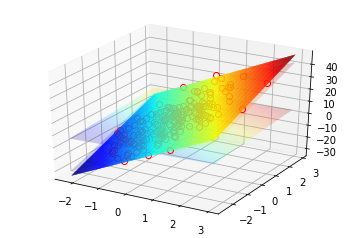

In [9]:
# 실행을 위한 세션 선언
sess = tf.Session()
# 최적화 과정을 통하여 구해질 변수 W,b 초기화
sess.run(tf.global_variables_initializer())

# 학습 데이터와 학습 결과를 matplotlib를 이용하여 결과 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1TrainData, x2TrainData, yTrainData,
        linestyle="none", marker="o", mfc="none", markeredgecolor="red")

Xs = np.arange(min(x1TrainData), max(x1TrainData), 0.05)
Ys = np.arange(min(x2TrainData), max(x2TrainData), 0.05)
Xs, Ys = np.meshgrid(Xs, Ys)

print("--------------------------------------------------------------------------------")
print("Train(Optimization) Start")
# totalStep 횟수 만큼 학습
for step in range(totalStep):
    # X, Y에 학습데이터 입력하여 비용함수, W, b, train을 실행
    cost_val, W1_val, W2_val, b_val, _ = sess.run([costFunction, W1, W2, b, train],
                                                  feed_dict={X1:x1TrainData,
                                                             X2:x2TrainData,
                                                             Y:yTrainData})
    # 학습 50회 마다 중간 결과 출력
    if step % 50 == 0:
        print("Step : {}, cost : {}, W1 : {}, W2 : {}, b : {}".format(step,
                                                                      cost_val,
                                                                      W1_val,
                                                                      W2_val,
                                                                      b_val))

        # 학습 단계 중간결과 Fitting Surface 추가
        if step % 100 == 0:
            ax.plot_surface(Xs, Ys, W1_val * Xs + W2_val * Ys + b_val,
                            rstride = 4, cstride = 4, alpha = 0.2, cmap = cm.jet)

print("Train Finished")
print("--------------------------------------------------------------------------------")

# 결과 확인 그래프
plt.show()

#세션종료
sess.close()